In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('../data/processed/reduced_scorecard.csv')

##### Data preparation

In [128]:
# Convert debt columns and LOAN_EVER to numeric
debt_cols = ['DEP_DEBT_MDN', 'IND_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN',
             'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN', 'LOAN_EVER']
df[debt_cols] = df[debt_cols].replace(('PrivacySuppressed', 'PS'), np.nan)
df[debt_cols] = df[debt_cols].apply(pd.to_numeric, errors='coerce')

# Map control values to institution types
control_map = {1.0: 'Public', 2.0: 'Private Non-Profit', 3.0: 'Private For-Profit'}
df['CONTROL_LABEL'] = df['CONTROL'].map(control_map)

In [129]:
sns.set_theme(style="whitegrid")

C:\Users\cambe\AppData\Local\Temp\ipykernel_30624\374119792.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  debt_stats = df.groupby('LOAN_BIN').agg(


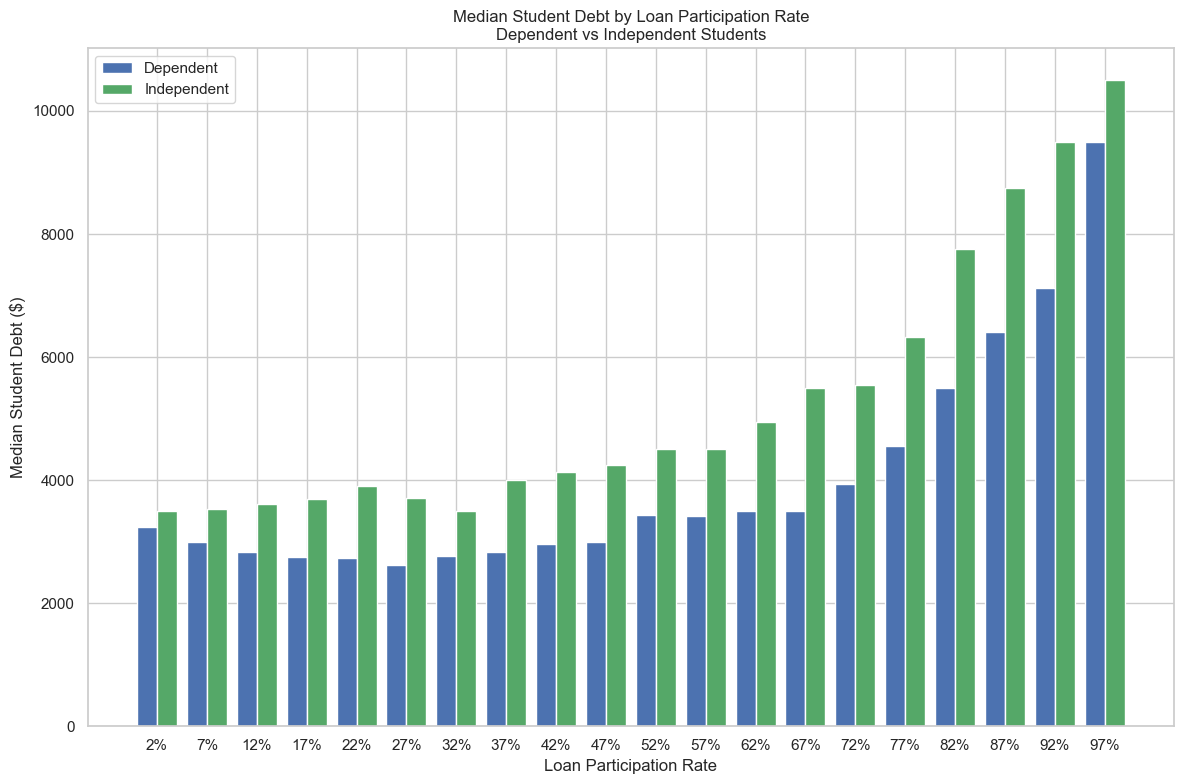

Dependent Debt Range: 2625.0 - 9500.0
Independent Debt Range: 3500.0 - 10500.0


In [132]:
# Bin LOAN_EVER values
df['LOAN_BIN'] = pd.cut(df['LOAN_EVER'], bins=np.arange(0, 1.05, 0.05))

# Group by bin and calculate medians
debt_stats = df.groupby('LOAN_BIN').agg(
    dep_median=('DEP_DEBT_MDN', 'median'),
    ind_median=('IND_DEBT_MDN', 'median')
).reset_index()

# Midpoint for plotting (as percentage)
debt_stats['bin_midpoint'] = np.arange(0.025, 1.025, 0.05) * 100

# Plot side-by-side bar chart
x = np.arange(len(debt_stats))
width = 0.4  # width of each bar

fig, ax = plt.subplots(figsize=(12, 8))

# Plot dependent and independent bars side by side
ax.bar(x - width/2, debt_stats['dep_median'], width=width, label='Dependent', color='#4C72B0')
ax.bar(x + width/2, debt_stats['ind_median'], width=width, label='Independent', color='#55A868')

# Axis and labels
ax.set_xlabel('Loan Participation Rate')
ax.set_ylabel('Median Student Debt ($)')
ax.set_title('Median Student Debt by Loan Participation Rate\nDependent vs Independent Students')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(val)}%" for val in debt_stats['bin_midpoint']])
ax.legend()
plt.tight_layout()
plt.show()

print("Dependent Debt Range:", debt_stats['dep_median'].min(), "-", debt_stats['dep_median'].max())
print("Independent Debt Range:", debt_stats['ind_median'].min(), "-", debt_stats['ind_median'].max())

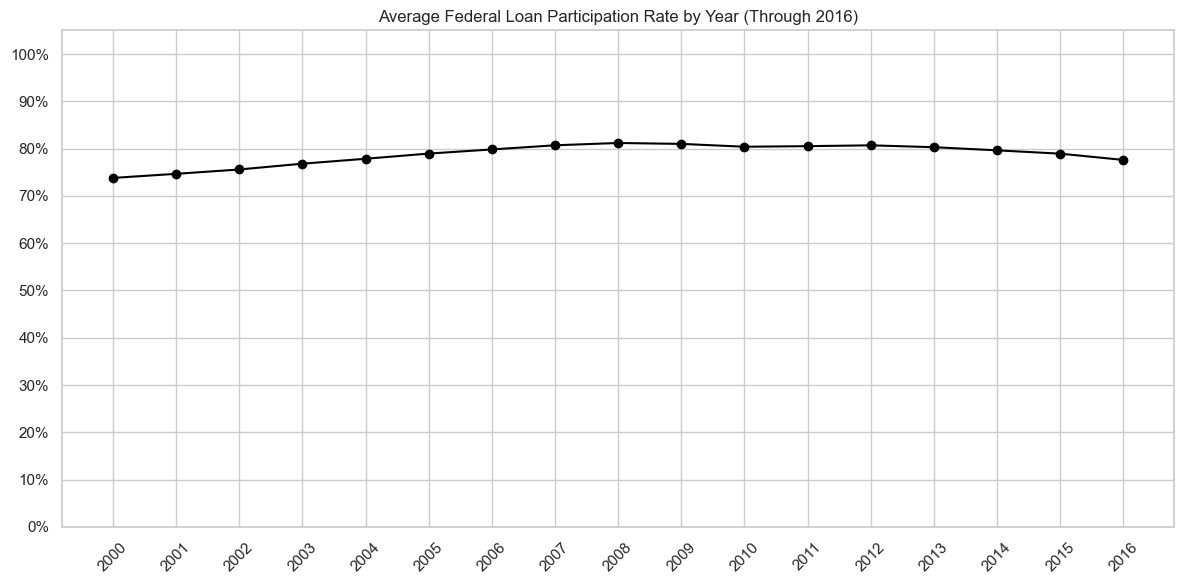

In [126]:
# Convert LOAN_EVER to numeric
df['LOAN_EVER'] = pd.to_numeric(df['LOAN_EVER'], errors='coerce')

# Filter to years up to and including 2016
filtered_df = df[df['Year'] <= 2016]

# Group by year and calculate average loan participation
grouped = filtered_df.groupby('Year')['LOAN_EVER'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped['Year'], grouped['LOAN_EVER'], marker='o', linestyle='-', color='black', label='Loan Participation Rate')

plt.title('Average Federal Loan Participation Rate by Year (Through 2016)')
plt.xticks(ticks=grouped['Year'], rotation=45)
plt.yticks(np.linspace(0, 1, 11), [f"{int(t*100)}%" for t in np.linspace(0, 1, 11)])
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()